# COMP 494 Final Project 

### Author: Kennedy Castillon-Jimenez
### Date: 4/28/2022 

### Student Alcohol Consumption 

Dataset: https://www.kaggle.com/datasets/uciml/student-alcohol-consumption?datasetId=251&sortBy=voteCount&language=Python

In this Dataset, we observe the values between a survey of math and portugese students in a highschool equivalency. It contains information from various categories where we can observe and hopefully try to predict a grade for a student. 

### Content and Categories 
school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)

sex - student's sex (binary: 'F' - female or 'M' - male)

age - student's age (numeric: from 15 to 22)

address - student's home address type (binary: 'U' - urban or 'R' - rural)

famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)

Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)

Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)

Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)

Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')

guardian - student's guardian (nominal: 'mother', 'father' or 'other')

traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

failures - number of past class failures (numeric: n if 1<=n<3, else 4)

schoolsup - extra educational support (binary: yes or no)

famsup - family educational support (binary: yes or no)

paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)

activities - extra-curricular activities (binary: yes or no)

nursery - attended nursery school (binary: yes or no)

higher - wants to take higher education (binary: yes or no)

internet - Internet access at home (binary: yes or no)

romantic - with a romantic relationship (binary: yes or no)

famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

freetime - free time after school (numeric: from 1 - very low to 5 - very high)

goout - going out with friends (numeric: from 1 - very low to 5 - very high)

Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

health - current health status (numeric: from 1 - very bad to 5 - very good)

absences - number of school absences (numeric: from 0 to 93)

### Final Project Requirements:  
There are four sections of the final project. You are expected to perform the following tasks within each section to fulfill the project requirements. 
- **Data Importing and Pre-processing (50 Points)**
    - Import dataset and describe characteristics such as dimensions, data types, file types, and import methods used
    - Clean, wrangle, and handle missing data
    - Transform data appropriately using techniques such as aggregation, normalization, and feature construction
    - Reduce redundant data and perform need based discretization
- **Data Analysis and Visualization (50 Points)**
    - Identify categorical, ordinal, and numerical variables within data
    - Provide measures of centrality and distribution with visualizations
    - Diagnose for correlations between variables and determine independent and dependent variables
    - Perform exploratory analysis in combination with visualization techniques to discover patterns and features of interest
- **Data Analytics (50 Points)**
    - Determine the need for a supervised or unsupervised learning method and identify dependent and independent variables
    - Train, test, and provide accuracy and evaluation metrics for model results
- **Presentation (50 Points)**
    - In a 5 to 10 minute presentation, briefly explain the project workflow from the code and results in your markdown notebook State your findings from the data and provide the interpretation of results from your analysis at each stage in the project

## Table of Contents: 

* [Data Importing and Pre-processing](#data-importing)
* [Data Visualization and Analysis](#data-vis)
* [Data Analytics](#data-analy)
* [Conclusion](#concl)

## Data Importing and Pre-processing 
<a class="anchor" id="data-importing"></a>

In [1]:
#These will most likely be the necessary libraries we need for the project

import pandas as pd
pd.set_option('display.max_columns', None)
from scipy.stats import norm, skew, probplot
from scipy.special import boxcox1p
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression as lr
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# reading in th edata from the file into a dataframe 

Mstudents_df = pd.read_csv("MathData.csv")

In [3]:
# checking if the data we read was correctly labeled 
Mstudents_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [4]:
# checking for size of rows and columns

Mstudents_df.shape

(395, 33)

In [5]:
# here we get a visual of what values of our set are object or 
# integer values
Mstudents_df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [6]:
categorical_count = 0
for dtype in Mstudents_df.dtypes:
    if dtype == 'object':
        categorical_count = categorical_count + 1

In [7]:
totalCol = 0
for dtype in Mstudents_df.dtypes:
    totalCol = totalCol + 1 

In [8]:
print('There are a total of', categorical_count, 'categorical variables.')
print('There are a total of', totalCol - categorical_count, 'continous variables.')

There are a total of 17 categorical variables.
There are a total of 16 continous variables.


In [9]:
# Seeing the Columm names 
Mstudents_df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

### Handling Missing Values 

In [10]:
# Here is a way to get a brief view of the missing values from our
# Data set. 
nullvals = Mstudents_df.isnull().sum()
nullvals.head(33)

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [11]:
# Here is a better visual in a table format

findingNulls = Mstudents_df.isnull().sum().sort_values()
NullsPercent = (Mstudents_df.isnull().sum()/Mstudents_df.isnull().count()).sort_values()
NullsTable = pd.concat([findingNulls, NullsPercent], axis=1, keys=['Nulls', 'Percent of Nulls'])
NullsTable.head(33)


,Nulls,Percent of Nulls
school,0,0.0
G1,0,0.0
absences,0,0.0
health,0,0.0
Walc,0,0.0
Dalc,0,0.0
goout,0,0.0
freetime,0,0.0
famrel,0,0.0
romantic,0,0.0


As observed, we can conclude that due to the fact that we can not see a single null value in our data set. We can then in turn continue into our further observations of our data set without having to handle our missing data. In turn we made sure that there was nothing in the data that was missing as we see in the two tables above.

### Handling Outliers

In [12]:
# here we get another observation of our data table to see an
# overview of our data spread 

Mstudents_df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10


Since most of these values tend to be rather object values than integer values, we are going to observe through a boxplot to see if there are any wild outliers on the data based off of the impact the outlier has on the skewedness of the plot. I chose these following parameters to view since I feel like they matter the most for predicting grades.

In [13]:
Mstudents_df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


Since I do see that we have two seperate columns for consumption during the week and weeknd I found it kind of useless to seperate either so I combined them in the following command. 

In [14]:
Mstudents_df['Dalc'] = Mstudents_df['Dalc'] + Mstudents_df['Walc']

Another thing is that I have the categories of G1,G2,G3 which are our three grades that we will be judging the following students, so in order to make this more manageable we will get the grades we need and just add them all together into one column as well. 

In [15]:
Mstudents_df['TotalGrades'] = Mstudents_df['G1']+ Mstudents_df['G2'] + Mstudents_df['G3']

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

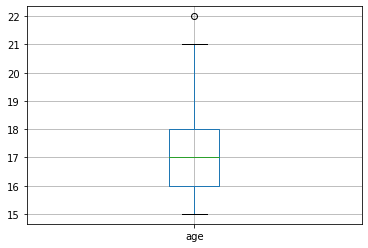

In [16]:
Mstudents_df.boxplot(column = ['age'])
Mstudents_df.age.describe()

The age data frame seems to be quite balanced and more or so skewed on the negative side actually since the mean is less than the median so I believe this outlier is fine for the purposes of our dataset. 

count    395.000000
mean       1.448101
std        0.697505
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

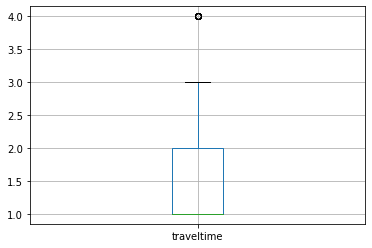

In [17]:
Mstudents_df.boxplot(column = ['traveltime'])
Mstudents_df.traveltime.describe()

The boxplot for travel time was heavily positevly skewed and the outlier was vastly past the median. So most likely I am going to drop that outlier, if I need the dataset in the later portion of this experiment.

count    395.000000
mean       5.708861
std        8.003096
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       75.000000
Name: absences, dtype: float64

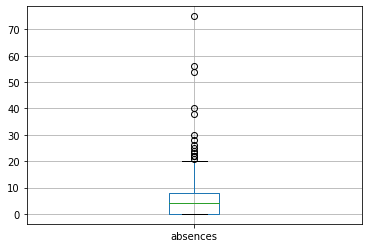

In [18]:
Mstudents_df.boxplot(column = ['absences'])
Mstudents_df.absences.describe()

So the absences are the real test of handling these outliers since we have a distribution from 0 - 7, where our mean is at least 5.7 absences and teh median is 4.0 abscenses. Therefore, I might limit my amount of outliers I can have to maximum 30 because above that will affect the data since if you have over 30 absences then alcohol is not going to affect your preformance in school if you can't even attend school, rather its affecting your life and you need help.

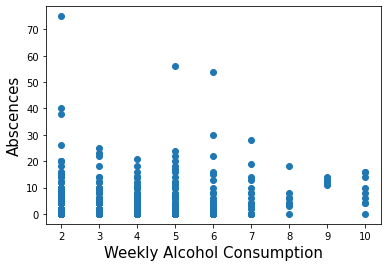

In [19]:
fig, ax = plt.subplots()
ax.scatter(x = Mstudents_df['Dalc'], y = Mstudents_df['absences'])
plt.ylabel('Abscences', fontsize=15)
plt.xlabel('Weekly Alcohol Consumption', fontsize=15)
plt.show()

Above is another visual on why our weekday alcohol, which is our value that we are going to use to be able to see the impact on the main targeted value. So most likely this will help actulaly instead rather drop values below 35 since there are still pivotal values between 30 and 35

In [20]:
# here we are dropping the values that we do not want which are those are above 35
# that was we wont have ridiculous numbers above it that at that point have more 
# negative impact that better 

Mstudents_df = Mstudents_df[Mstudents_df.absences < 35]

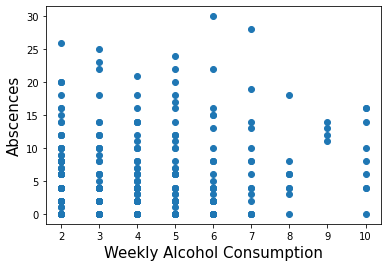

In [21]:
fig, ax = plt.subplots()
ax.scatter(x = Mstudents_df['Dalc'], y = Mstudents_df['absences'])
plt.ylabel('Abscences', fontsize=15)
plt.xlabel('Weekly Alcohol Consumption', fontsize=15)
plt.show()

Here is a better view of how our new data looks and looks alot better manageable to in comparison to our weekday alcohol consumption 

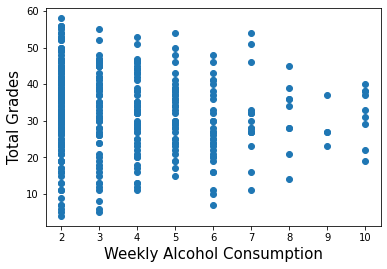

In [22]:
# Lastly I wanted to compare the two important variables of this 
# which is total grades and alcohol consumption... 
fig, ax = plt.subplots()
ax.scatter(x = Mstudents_df['Dalc'], y = Mstudents_df['TotalGrades'])
plt.ylabel('Total Grades', fontsize=15)
plt.xlabel('Weekly Alcohol Consumption', fontsize=15)
plt.show()

The way this plot is set really shows that we dont need to change or drop anything since the way they are set really help us see that there are any ridiculous outliers. 

### Normalization of Data


 mu = 32.07 and sigma = 11.13



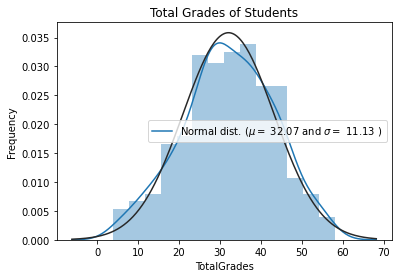

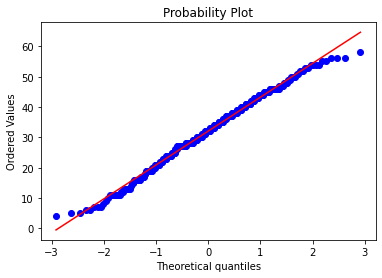

In [23]:
sns.distplot(Mstudents_df['TotalGrades'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(Mstudents_df['TotalGrades'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('Total Grades of Students')

#Get also the QQ-plot
fig = plt.figure()
res = probplot(Mstudents_df['TotalGrades'], plot=plt)
plt.show()

Our target value is pretty normalized so I do not believe we need to do furthermore on the data set. 

## Data Visualization and Analysis
<a class="anchor" id="data-vis"></a>

In [24]:
from sklearn.preprocessing import LabelEncoder

Here we are going to see a couple of images to see more graph to be able to grasp visually our data at hand. 

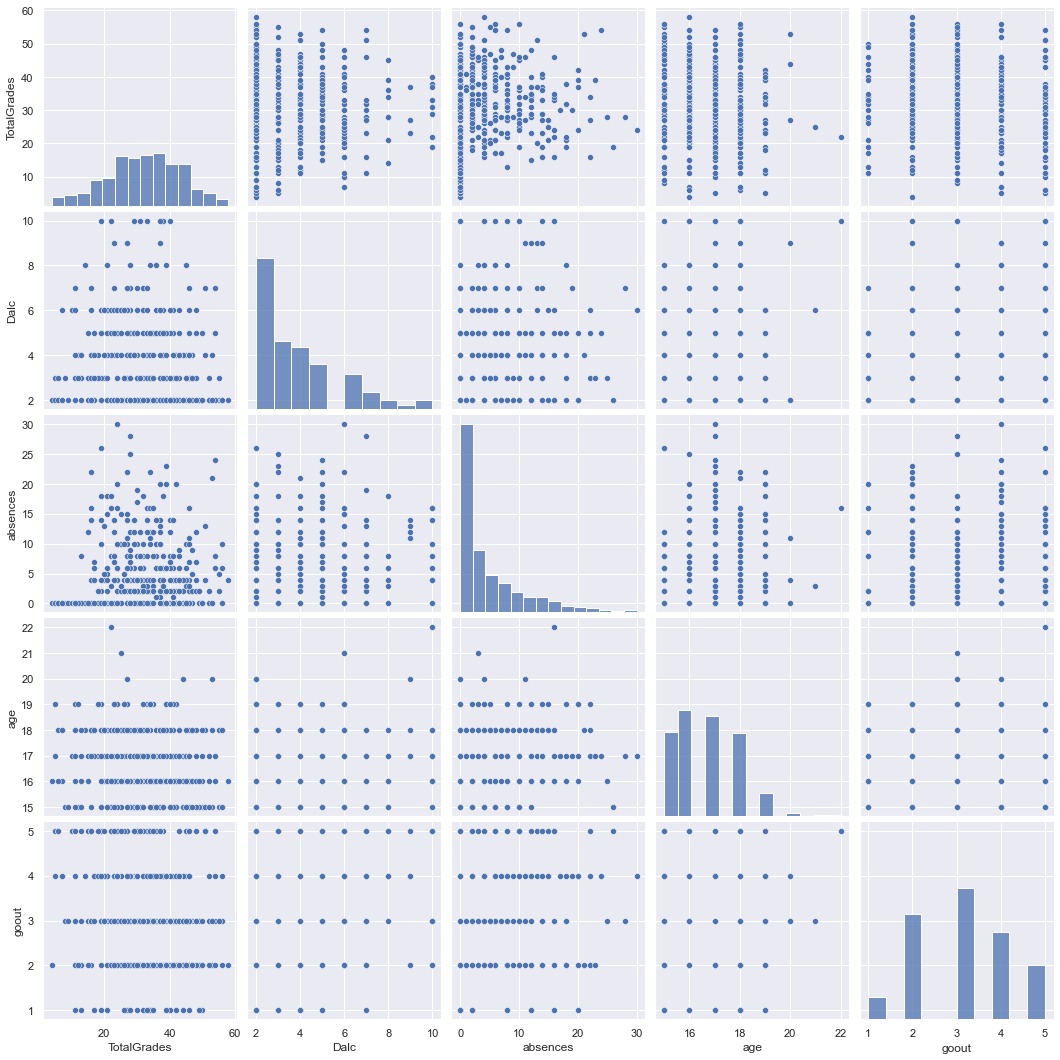

In [25]:
# Below is a scatter plot of our targetted variables 


sns.set()

cols = ['TotalGrades', 'Dalc', 'absences', 'age', 'goout']
sns.pairplot(Mstudents_df[cols], size = 3)
plt.show();

I chose these variables as two of them are my target which is weekly alcohol and Total Grade but I believe that absences and going out can also play a pivotal role in predicting the grade of subject

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5]),
 [Text(0, 0.5, 'age'),
  Text(0, 1.5, 'Medu'),
  Text(0, 2.5, 'Fedu'),
  Text(0, 3.5, 'traveltime'),
  Text(0, 4.5, 'studytime'),
  Text(0, 5.5, 'failures'),
  Text(0, 6.5, 'famrel'),
  Text(0, 7.5, 'freetime'),
  Text(0, 8.5, 'goout'),
  Text(0, 9.5, 'Dalc'),
  Text(0, 10.5, 'Walc'),
  Text(0, 11.5, 'health'),
  Text(0, 12.5, 'absences'),
  Text(0, 13.5, 'G1'),
  Text(0, 14.5, 'G2'),
  Text(0, 15.5, 'G3'),
  Text(0, 16.5, 'TotalGrades')])

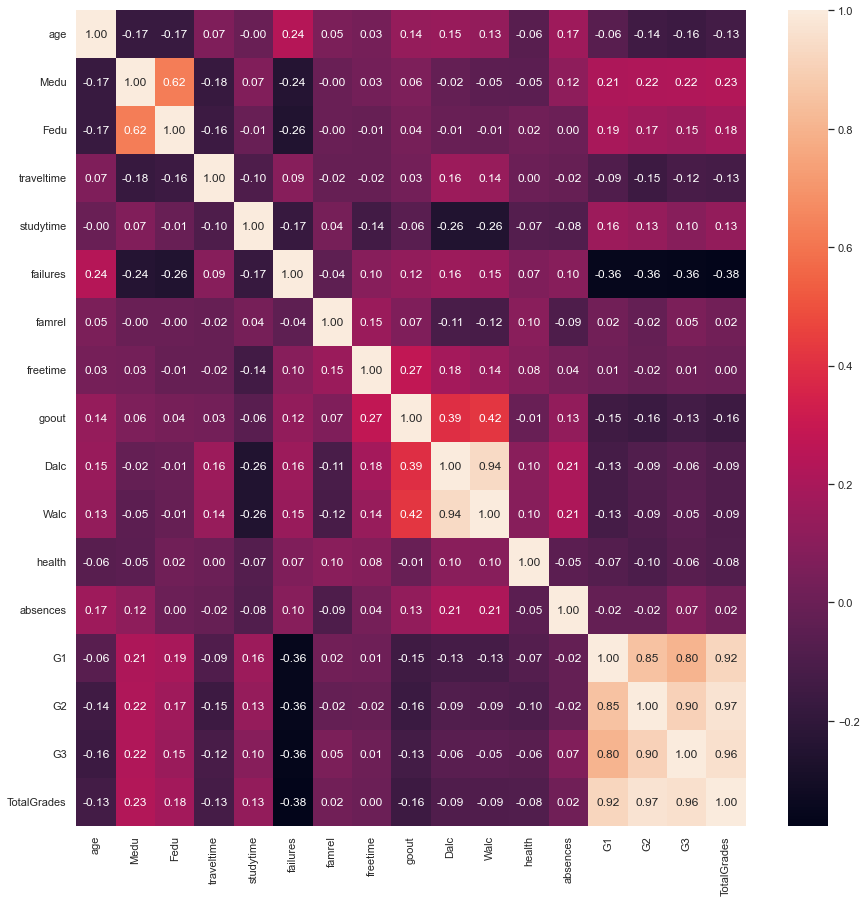

In [26]:
plt.figure(figsize=(15,15))
sns.heatmap(Mstudents_df.corr(),annot = True,fmt = ".2f",cbar = True)
plt.xticks(rotation=90)
plt.yticks(rotation = 0)

Again, here is our heatmap to see how the features interact with eachother and how they correlate in relation to one another. The only standout area for our heat map was wether in the range of students scoring and thier grades really correlated with eachother.

Text(0.5, 0, 'Weekly Acohol Consumption')

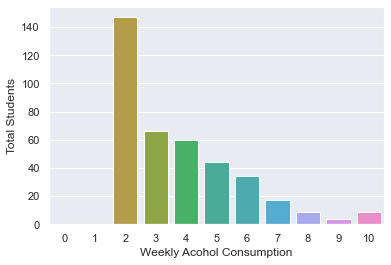

In [27]:
list = []
for i in range(11):
    list.append(len(Mstudents_df[Mstudents_df.Dalc == i]))
ax = sns.barplot(x = [0,1,2,3,4,5,6,7,8,9,10], y = list)
plt.ylabel('Total Students')
plt.xlabel('Weekly Acohol Consumption' ) 

Just by this data visual these values are theoretical so of course we wont have have anything with a one or zero because 1 is the lowest number between both columns of Wacl (alcohol on the weekends) and Dalc (which was previously alcohol during the weekday) 

### Label encoding categorical variables and cleaning the data

Here we are organizing our categorical variables of interest that can affect the students grade alongside the acohol consumption. This includes those such as 'sex', 'schoolsup, 'famsup', 'romantic', 'Pstatus', 'gaurdian', and 'internet'. The other in my opinion where nonetheless not as important for the students acohol consumption. 

In [28]:
Mstudents_df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,TotalGrades
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,2,1,3,6,5,6,6,17
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,2,1,3,4,5,5,6,16
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,5,3,3,10,7,8,10,25
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,2,1,5,2,15,14,15,44
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,3,2,5,4,6,10,10,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,9,5,4,11,9,9,9,27
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,7,4,2,3,14,16,16,46
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,6,3,3,3,10,8,7,25
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,7,4,5,0,11,12,10,33


In [29]:
Mstudents_df['schoolsup'] = Mstudents_df['schoolsup'].map({'no': 0, 'yes': 1}).astype(int)
Mstudents_df['famsup'] = Mstudents_df['famsup'].map({'no': 0, 'yes': 1}).astype(int)
Mstudents_df['romantic'] = Mstudents_df['romantic'].map({'no': 0, 'yes': 1}).astype(int)
Mstudents_df['Pstatus'] = Mstudents_df['Pstatus'].map({'A': 0, 'T': 1}).astype(int)
Mstudents_df['guardian'] = Mstudents_df['guardian'].map({'father': 0, 'mother': 1, 'other': 2}).astype(int)
Mstudents_df['internet'] = Mstudents_df['internet'].map({'no': 0, 'yes': 1}).astype(int)
Mstudents_df['sex'] = Mstudents_df['sex'].map({'M': 0, 'F': 1}).astype(int)

In [30]:
Mstudents_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,TotalGrades
0,GP,1,18,U,GT3,0,4,4,at_home,teacher,course,1,2,2,0,1,0,no,no,yes,yes,0,0,4,3,4,2,1,3,6,5,6,6,17
1,GP,1,17,U,GT3,1,1,1,at_home,other,course,0,1,2,0,0,1,no,no,no,yes,1,0,5,3,3,2,1,3,4,5,5,6,16
2,GP,1,15,U,LE3,1,1,1,at_home,other,other,1,1,2,3,1,0,yes,no,yes,yes,1,0,4,3,2,5,3,3,10,7,8,10,25
3,GP,1,15,U,GT3,1,4,2,health,services,home,1,1,3,0,0,1,yes,yes,yes,yes,1,1,3,2,2,2,1,5,2,15,14,15,44
4,GP,1,16,U,GT3,1,3,3,other,other,home,0,1,2,0,0,1,yes,no,yes,yes,0,0,4,3,2,3,2,5,4,6,10,10,26


In [31]:
# now we are going to check the skew on almost all of the 
# numeric values that there are 
numeric_feats = Mstudents_df.dtypes[Mstudents_df.dtypes != "object"].index
skewed_feats = Mstudents_df[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
failures,2.383304
schoolsup,2.224198
traveltime,1.602814
absences,1.497695
Dalc,1.176541
romantic,0.731727
studytime,0.631886
Walc,0.610307
age,0.476314
G1,0.233033


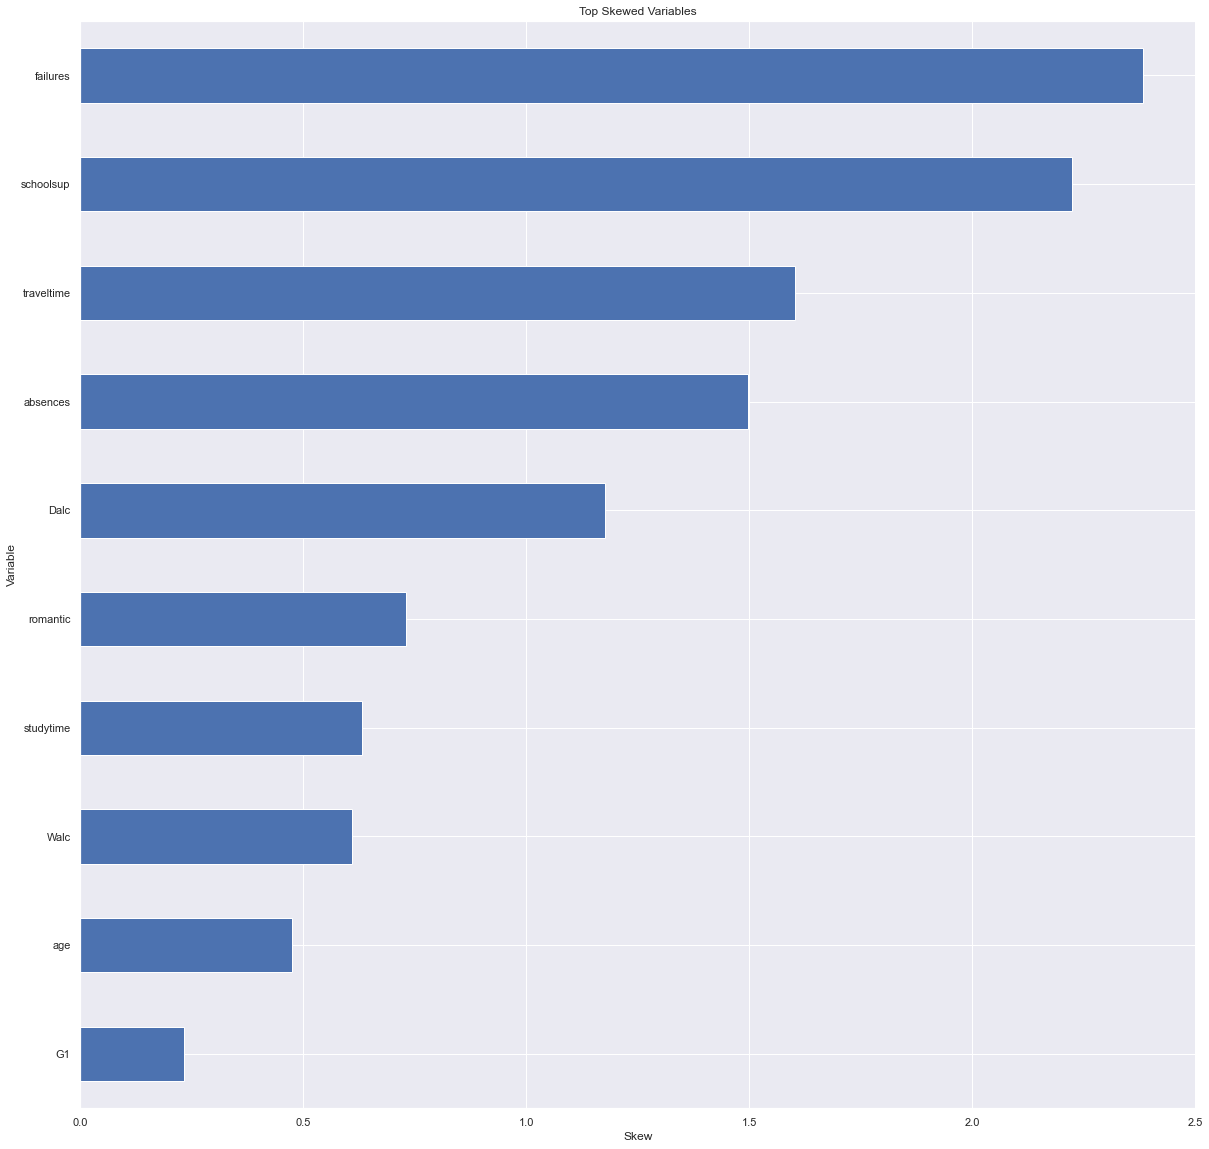

In [32]:
skewness['Skew'].head(10).plot(kind='barh', figsize = (20,20)).invert_yaxis() #top 10 missing columns
plt.xlabel("Skew")
plt.ylabel("Variable")
plt.title("Top Skewed Variables")
plt.show()

Above is the measurement of our variables with the largest skew values meaning that they deviate from what should be the traditional bell curve and as we see Failures which is the number of past classes that were failed had the largest skew value. 

In [33]:
Mstudents_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,TotalGrades
0,GP,1,18,U,GT3,0,4,4,at_home,teacher,course,1,2,2,0,1,0,no,no,yes,yes,0,0,4,3,4,2,1,3,6,5,6,6,17
1,GP,1,17,U,GT3,1,1,1,at_home,other,course,0,1,2,0,0,1,no,no,no,yes,1,0,5,3,3,2,1,3,4,5,5,6,16
2,GP,1,15,U,LE3,1,1,1,at_home,other,other,1,1,2,3,1,0,yes,no,yes,yes,1,0,4,3,2,5,3,3,10,7,8,10,25
3,GP,1,15,U,GT3,1,4,2,health,services,home,1,1,3,0,0,1,yes,yes,yes,yes,1,1,3,2,2,2,1,5,2,15,14,15,44
4,GP,1,16,U,GT3,1,3,3,other,other,home,0,1,2,0,0,1,yes,no,yes,yes,0,0,4,3,2,3,2,5,4,6,10,10,26


In [34]:
Mstudents_df = pd.get_dummies(Mstudents_df)
Mstudents_df.head()

,sex,age,Pstatus,Medu,Fedu,guardian,traveltime,studytime,failures,schoolsup,famsup,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,TotalGrades,school_GP,school_MS,address_R,address_U,famsize_GT3,famsize_LE3,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes
0,1,18,0,4,4,1,2,2,0,1,0,0,0,4,3,4,2,1,3,6,5,6,6,17,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,1,0,1
1,1,17,1,1,1,0,1,2,0,0,1,1,0,5,3,3,2,1,3,4,5,5,6,16,1,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,1
2,1,15,1,1,1,1,1,2,3,1,0,1,0,4,3,2,5,3,3,10,7,8,10,25,1,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,1
3,1,15,1,4,2,1,1,3,0,0,1,1,1,3,2,2,2,1,5,2,15,14,15,44,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,1
4,1,16,1,3,3,0,1,2,0,0,1,0,0,4,3,2,3,2,5,4,6,10,10,26,1,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,1,0,1


The function above turns our categorical values and turns them into dummy or indicator variables. 

# Data Analytics 
<a class="anchor" id="data-analy"></a>

In this chunk of code we will begin by observing the prediction model for our data testing

In [35]:
# here we observe the correlation between values in
# a descending order based on our main variable from what we are trying
# to figure our which is grades 

Mstudents_df.corr()['TotalGrades'].sort_values(ascending=False) 

TotalGrades          1.000000
G2                   0.968073
G3                   0.959837
G1                   0.919411
Medu                 0.227828
higher_yes           0.190757
Fedu                 0.178543
studytime            0.132355
Mjob_health          0.128699
Fjob_teacher         0.122010
address_U            0.109404
internet             0.104150
reason_reputation    0.103727
paid_yes             0.089939
famsize_LE3          0.084362
Mjob_services        0.083514
Mjob_teacher         0.070443
nursery_yes          0.064755
Fjob_health          0.046927
school_GP            0.044400
activities_yes       0.040183
reason_other         0.033024
famrel               0.023447
absences             0.016423
Fjob_at_home         0.007951
freetime             0.002623
Fjob_services        0.001299
reason_home         -0.013114
activities_no       -0.040183
school_MS           -0.044400
Pstatus             -0.045720
famsup              -0.060303
nursery_no          -0.064755
guardian  

As we can see from the get go, the best predictor for total grades is the previous grades they recieve but for our case we are going to not utilize those variables to be able to predict on the acohol front

Since we are trying to predict grades our target variable for this would be the grades of students and alongside the variables that impact it such as alcohol consumption. Therefore I will be building a regression model for this to predict Total Grades

In [36]:
Mstudents_df

,sex,age,Pstatus,Medu,Fedu,guardian,traveltime,studytime,failures,schoolsup,famsup,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,TotalGrades,school_GP,school_MS,address_R,address_U,famsize_GT3,famsize_LE3,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes
0,1,18,0,4,4,1,2,2,0,1,0,0,0,4,3,4,2,1,3,6,5,6,6,17,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,1,0,1
1,1,17,1,1,1,0,1,2,0,0,1,1,0,5,3,3,2,1,3,4,5,5,6,16,1,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,1
2,1,15,1,1,1,1,1,2,3,1,0,1,0,4,3,2,5,3,3,10,7,8,10,25,1,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,1
3,1,15,1,4,2,1,1,3,0,0,1,1,1,3,2,2,2,1,5,2,15,14,15,44,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,1
4,1,16,1,3,3,0,1,2,0,0,1,0,0,4,3,2,3,2,5,4,6,10,10,26,1,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,0,20,0,2,2,2,1,2,2,0,1,0,0,5,5,4,9,5,4,11,9,9,9,27,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,1
391,0,17,1,3,1,1,2,1,0,0,0,1,0,2,4,5,7,4,2,3,14,16,16,46,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1
392,0,21,1,1,1,2,1,1,3,0,0,0,0,5,5,3,6,3,3,3,10,8,7,25,0,1,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,1
393,0,18,1,3,2,1,3,1,0,0,0,1,0,4,4,1,7,4,5,0,11,12,10,33,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,1


In [37]:
Mstudents_df.iloc[:,[0,1,8,12,14,15,16,19]]

,sex,age,failures,romantic,freetime,goout,Dalc,absences
0,1,18,0,0,3,4,2,6
1,1,17,0,0,3,3,2,4
2,1,15,3,0,3,2,5,10
3,1,15,0,1,2,2,2,2
4,1,16,0,0,3,2,3,4
...,...,...,...,...,...,...,...,...
390,0,20,2,0,5,4,9,11
391,0,17,0,0,4,5,7,3
392,0,21,3,0,5,3,6,3
393,0,18,0,0,4,1,7,0


In [40]:
# Independent Variable X and the dependent variable in Y 
#X = Mstudents_df.drop(['Medu','Fedu','studytime', 'Walc','health','G1','TotalGrades', 'G2', 'G3', 'school_GP'], axis = 1)

X = Mstudents_df.iloc[:,[0,1,8,12,14,15,16,19]]
# we just dropped the columns with categories we deemed unnecessary for the following
Y = Mstudents_df['TotalGrades']

In [41]:
# here we are splitting the data set into a trainign set and a test set 
X_train, X_test, Y_train, Y_test = tts(X, Y, test_size=0.2, random_state=20)

### Linear Regression Model: 

In [42]:
#here we have our linear regression model for the predicted and actual 
linear = lr()
linear.fit(X_train, Y_train)
Y_pred = linear.predict(X_test)
Y_compare_linear = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
Y_compare_linear.head(20) 

,Actual,Predicted
10,27,32.744434
383,11,29.533761
17,28,34.447146
123,38,37.561243
207,36,33.861342
167,45,30.565269
130,12,19.746101
91,51,33.054102
105,32,34.940830
198,54,28.687276


### Decision Tree Model 

In [43]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train,Y_train)
Y_pred = rf.predict(X_test)
Y_compare_randomforrest = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
Y_compare_randomforrest.head(20) 

,Actual,Predicted
10,27,31.023333
383,11,17.840000
17,28,29.528857
123,38,24.950000
207,36,30.302000
167,45,33.020000
130,12,15.820000
91,51,36.290000
105,32,36.465000
198,54,26.050000


### K-nearest Neighbor Regression Model: 

In [44]:
knn = KNeighborsRegressor(n_neighbors=15)
knn.fit(X_train,Y_train)
Y_pred = knn.predict(X_test)
Y_compare_knn = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
Y_compare_knn.head(20) 

,Actual,Predicted
10,27,33.333333
383,11,26.333333
17,28,31.200000
123,38,26.266667
207,36,34.800000
167,45,33.000000
130,12,20.666667
91,51,36.600000
105,32,33.400000
198,54,28.333333


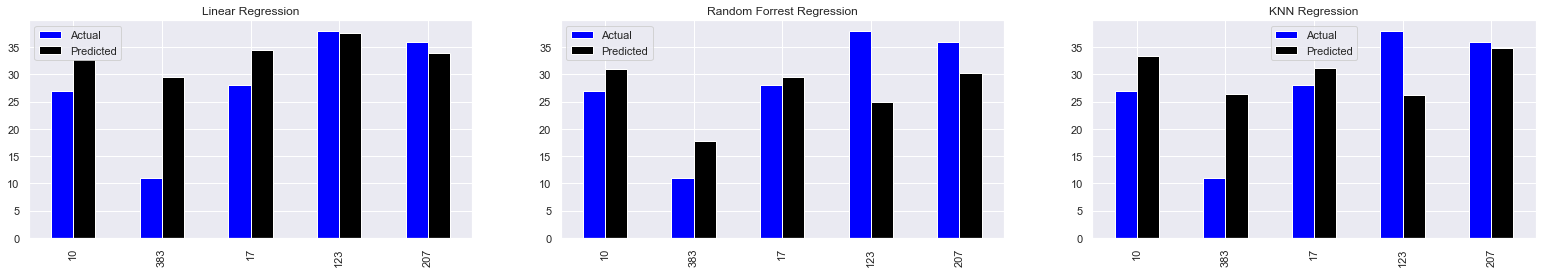

In [66]:
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(27,4))
ax = ax.flatten()
colors = ['blue', 'black']
Y_compare_linear.head(5).plot(kind='bar',color = colors, title='Linear Regression', grid=True, ax=ax[0])
Y_compare_randomforrest.head(5).plot(kind='bar',color = colors, title='Random Forrest Regression', grid=True, ax=ax[1])
Y_compare_knn.head(5).plot(kind='bar',color = colors, title='KNN Regression', grid=True, ax=ax[2])
plt.show()

In [46]:
lin_mse = mean_squared_error(Y_compare_linear['Actual'],Y_compare_linear['Predicted'])
rf_mse = mean_squared_error(Y_compare_randomforrest['Actual'],Y_compare_randomforrest['Predicted'])
knn_mse = mean_squared_error(Y_compare_knn['Actual'],Y_compare_knn['Predicted'])

In [47]:
print('Mean Square Error of Linear Regression Model is:',lin_mse)
print('Mean Square Error of Random Forest Regression Model is:',rf_mse)
print('Mean Square Error of K Nearest Neighbors Regression Model is:',knn_mse)

Mean Square Error of Linear Regression Model is: 116.57760165488278
Mean Square Error of Random Forest Regression Model is: 115.81072600507296
Mean Square Error of K Nearest Neighbors Regression Model is: 122.69703703703705


For our Mean Square error, we can observe very high error values in our data set and this is because there is a large difference between the predicted and the actual values so it is looking like our best preforming model in this sense was our Linear regression model, and in the case of alcohol the correlation is not strong enough for it. 

In [48]:
lin_r2 = r2_score(Y_compare_linear['Actual'],Y_compare_linear['Predicted'])
rf_r2 = r2_score(Y_compare_randomforrest['Actual'],Y_compare_randomforrest['Predicted'])
knn_r2 = r2_score(Y_compare_knn['Actual'],Y_compare_knn['Predicted'])

In [49]:
print('r2 of Linear Regression Model is:',lin_r2)
print('r2 of Random Forest Regression Model is:',rf_r2)
print('r2 of K Nearest Neighbors Regression Model is:',knn_r2)

r2 of Linear Regression Model is: 0.11827791304547508
r2 of Random Forest Regression Model is: 0.12407809411616366
r2 of K Nearest Neighbors Regression Model is: 0.07199422510248821


So what this means is that unfortunately as we saw from the large errors previously seen, my model is not that accurate as it seems the variables that I utilized to predict them might not be an impactful or influential as I was hoping for on this data set. 

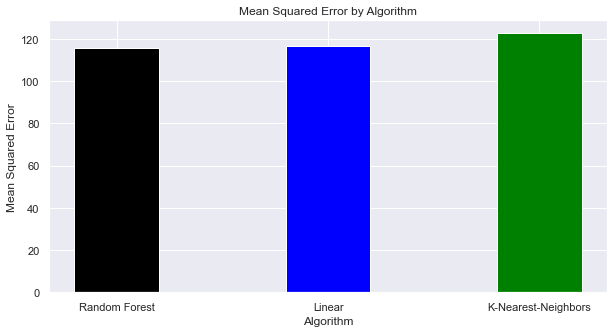

In [67]:
data = {'Linear':lin_mse,'Random Forest':rf_mse, 'K-Nearest-Neighbors':knn_mse}
data = dict(sorted(data.items(), key=lambda item: item[1]))

courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
color = ['black','blue','green']
plt.bar(courses, values, color = color,width = 0.4)
 
plt.xlabel("Algorithm")
plt.ylabel("Mean Squared Error")
plt.title("Mean Squared Error by Algorithm")
plt.show()

Here we can observe visually the differnce in preformance between our regression models, in terms of the mean squared error.

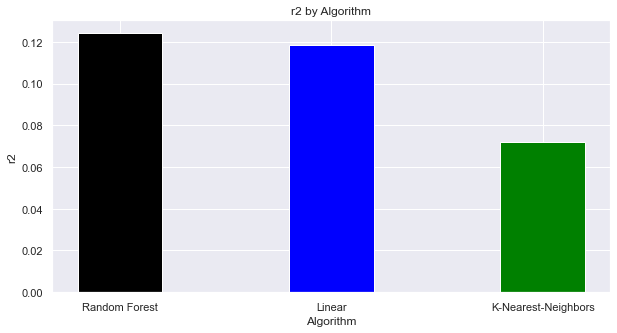

In [68]:
data = {'Linear':lin_r2,'Random Forest':rf_r2, 'K-Nearest-Neighbors':knn_r2}
data = dict(sorted(data.items(), key=lambda item: item[1],reverse=True))

courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
color = ['black','blue','green']
plt.bar(courses, values, color = color,width = 0.4)
 
plt.xlabel("Algorithm")
plt.ylabel("r2")
plt.title("r2 by Algorithm")
plt.show()

Here is a visual aspect of our model and its preformance in terms of the R squared model where we see the proportion fo the variation in the dependent variable and what is predictable from the independent variable. 

## Conclusion
<a class="anchor" id="concl"></a>

As we observed above, the prediction for the total grade for the students was not the most accurate and all three of my regression models demonstrated that it is not the best predicting measure. My other variables in the data had almost little to no impact on the total grades as it was kind of predicted from seeing the previous correlations in the table and heat map that the other variables would have had little to no impact on the students outcome to predict it. Rather, what was a better measure to see the grade outcome would have been to see the previous three grades of the student to be able to predict the fourth depending on the circumstance and where they stand would have been better predictors  of the student grade aspect of it. 

So in that case, drink away since my model said so!

credit for utilized syntax and concepts: 
https://www.kaggle.com/code/kanncaa1/does-alcohol-affect-success (Datai) 
https://www.kaggle.com/code/mohaiminul101/student-grade-prediction-and-eda 
(Mohaiminul Islam) 
boston-housing-data-analysis-machine-learning
(Daniel Matlock)
Daniel_Matlock_Final_Project_Housing_Prices
(Daniel Matlock)